In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('dane/users.dat',engine='python', sep='::',header=None,names=unames)

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('dane/ratings.dat',engine='python',sep='::',header=None,names=rnames)

mnames = ['movie_id','title','genres']
movies = pd.read_table('dane/movies.dat',encoding='ISO-8859-1', engine='python',sep='::',header=None,names=mnames)
# movies = pd.read_table('dane/movies.dat', engine='python',sep='::',header=None,names=mnames)

In [4]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
data = pd.merge(pd.merge(ratings,users),movies)
data
#wynik = pd.merge(ratings,users,on='ID',how='inner')
#wynik = pd.merge(ratings,users,left_on='ID',right_on='ID_usr',how='inner')

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [9]:
mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [11]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971) 37
'Night Mother (1986) 70
'Til There Was You (1997) 52
'burbs, The (1989) 303
...And Justice for All (1979) 199
1-900 (1994) 2
10 Things I Hate About You (1999) 700
101 Dalmatians (1961) 565
101 Dalmatians (1996) 364
12 Angry Men (1957) 616
dtype: int64

In [12]:
active_titles = ratings_by_title.index[ratings_by_title>=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [13]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [15]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [17]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [18]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [19]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [20]:
ratings_std_by_title = data.groupby('title')['rating'].std()
ratings_std_by_title = ratings_std_by_title.loc[active_titles]
ratings_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994) 1.321333
Blair Witch Project, The (1999) 1.316368
Natural Born Killers (1994) 1.307198
Tank Girl (1995) 1.277695
Rocky Horror Picture Show, The (1975) 1.260177
Eyes Wide Shut (1999) 1.259624
Evita (1996) 1.253631
Billy Madison (1995) 1.249970
Fear and Loathing in Las Vegas (1998) 1.246408
Bicentennial Man (1999) 1.245533
Name: rating, dtype: float64

system rekomendacji oparty na macierzy użytkownik - film

In [27]:
#utworzenie macierzy użytkownik - film
user_movie_matrix = data.pivot_table('rating',index='user_id',columns='title',aggfunc='mean')
# mean_ratings = data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
user_movie_matrix.head(3)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def get_similar_movies(movie_name, min_ratings=50):
    # wektor ocen dla danego filmu
    movie_ratings = user_movie_matrix[movie_name]
    
    # oblicz korelację Pearsona z innymi filmami
    similar_to_movie = user_movie_matrix.corrwith(movie_ratings)
    
    # stwórz DataFrame i dodaj liczby ocen
    corr_movie = pd.DataFrame(similar_to_movie, columns=['PearsonR'])
    corr_movie.dropna(inplace=True)
    
    # dodaj liczby ocen
    rating_counts = data.groupby('title')['rating'].count()
    corr_movie['RatingCount'] = rating_counts
    
    # filtruj i posortuj
    recommendations = corr_movie[corr_movie['RatingCount'] > min_ratings].sort_values('PearsonR', ascending=False)
    
    return recommendations.head(10)


                                                    PearsonR  RatingCount
title                                                                    
Schindler's List (1993)                             1.000000         2304
Butterfly (La Lengua de las Mariposas) (2000)       0.676434           69
Faraway, So Close (In Weiter Ferne, So Nah!) (1...  0.522433           66
For Whom the Bell Tolls (1943)                      0.510445           98
Dracula (1958)                                      0.507609          102
Bread and Chocolate (Pane e cioccolata) (1973)      0.505254           67
Tigerland (2000)                                    0.498251           54
Hamlet (1964)                                       0.471290           53
Love! Valour! Compassion! (1997)                    0.467256          103
River, The (1984)                                   0.466872           64


/opt/python/envs/default_3_11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/python/envs/default_3_11/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/python/envs/default_3_11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/python/envs/default_3_11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/python/envs/default_3_11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


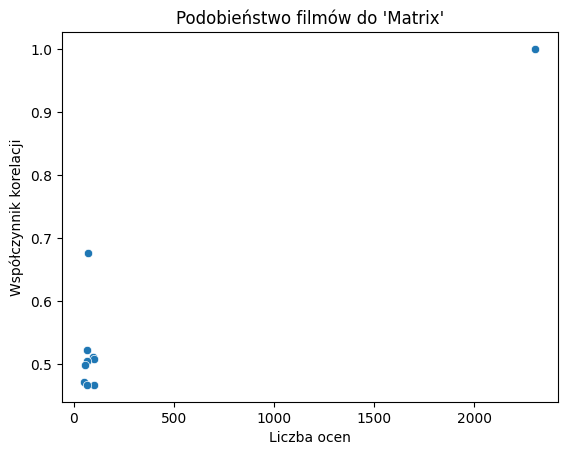

In [30]:
# Przykład użycia
rekomendacje = get_similar_movies("Schindler's List (1993)")
print(rekomendacje)

# Wizualizacja
sns.scatterplot(data=rekomendacje, x='RatingCount', y='PearsonR')
plt.title("Podobieństwo filmów do 'Matrix'")
plt.xlabel("Liczba ocen")
plt.ylabel("Współczynnik korelacji")
plt.show()